In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [58]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('insurance_data.csv')

In [59]:
print("Step 1: Basic DataFrame Exploration")

Step 1: Basic DataFrame Exploration


In [60]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [61]:
df.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [62]:
# observations:
# there are a mix of numeric and category columns.
# there are missing values
# label column is claim

In [63]:
df.shape

(1340, 11)

In [64]:
# ML models require examples i.e. rows. A good thumb rule to use is 100 rows per column. Our dataset fits that.

In [65]:
df.dtypes

index              int64
PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

In [66]:
# some columns require encoding as they are categorical

In [67]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')


In [68]:
# Step 2: Summary statistics of numeric columns

In [69]:
print("\nStep 2: Summary Statistics of Numeric Columns")
df.describe()


Step 2: Summary Statistics of Numeric Columns


,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [70]:
# 1340 rows in the dataset. Age has 5 missing values.
# claim column has wide range. may have outliers.

In [71]:
# Step 3: Value counts of category columns

In [72]:
# include one for each column:
df.gender.value_counts()

male      678
female    662
Name: gender, dtype: int64

In [73]:
df.diabetic.value_counts()

No     698
Yes    642
Name: diabetic, dtype: int64

In [74]:
df.smoker.value_counts()

No     1066
Yes     274
Name: smoker, dtype: int64

In [75]:
# Step 4: Data Visualization

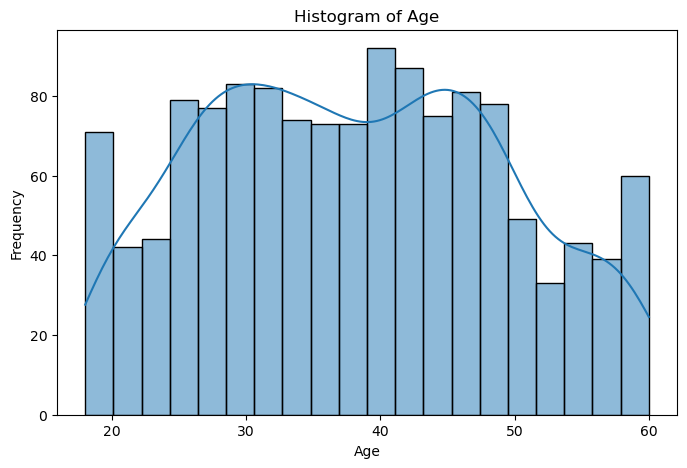

In [76]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

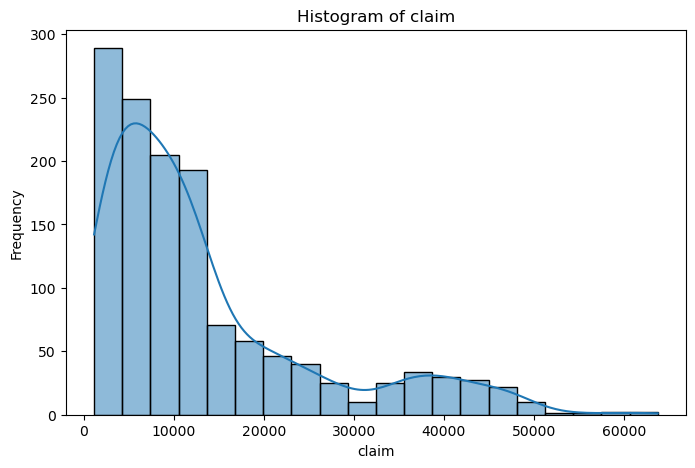

In [77]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['claim'], bins=20, kde=True)
plt.title('Histogram of claim')
plt.xlabel('claim')
plt.ylabel('Frequency')
plt.show()

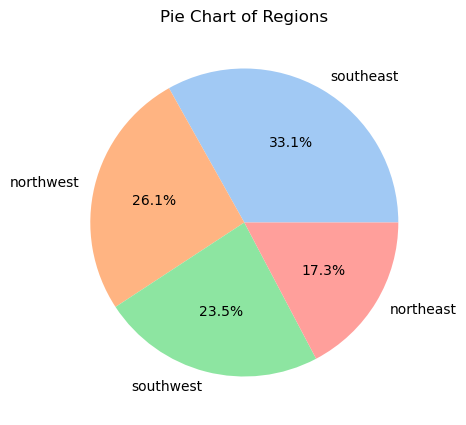

In [78]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Regions')
plt.ylabel('')
plt.show()

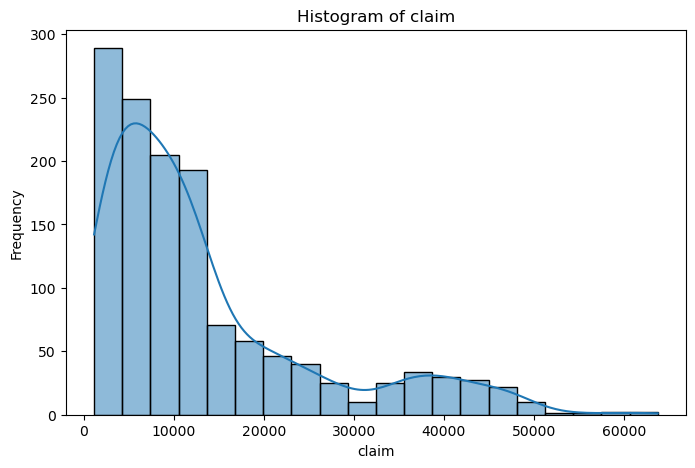

In [79]:
plt.figure(figsize=(8, 5))
sns.histplot(df['claim'], bins=20, kde=True)
plt.title('Histogram of claim')
plt.xlabel('claim')
plt.ylabel('Frequency')
plt.show()

In [80]:
# shows some outliers in BMI column

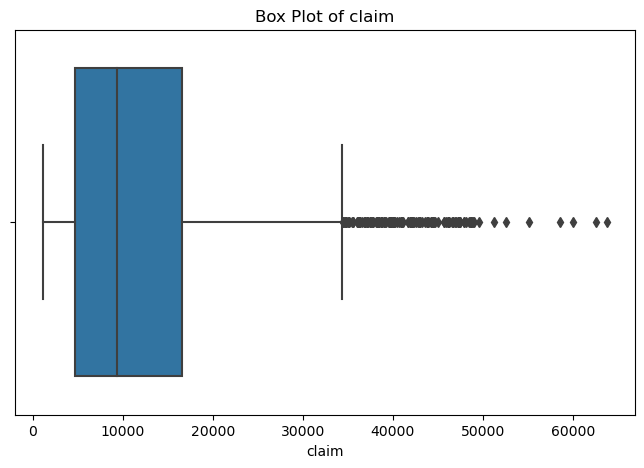

In [81]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['claim'])
plt.title('Box Plot of claim')
plt.xlabel('claim')
plt.show()

<Axes: xlabel='age', ylabel='claim'>

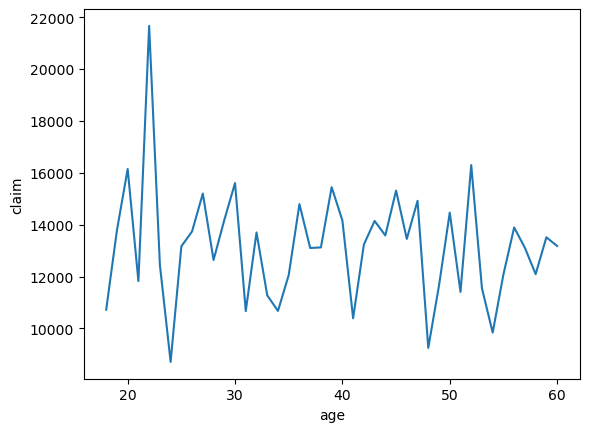

In [82]:
# Bivariate Line Plot
sns.lineplot(x='age', y='claim', data=df, errorbar=None)

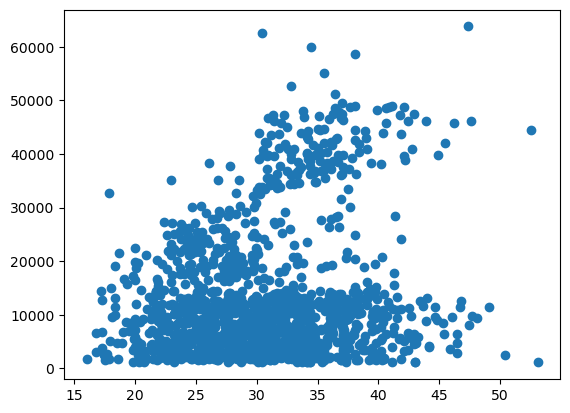

In [83]:
plt.scatter(x='bmi', y='claim', data=df)

<Axes: xlabel='bmi', ylabel='claim'>

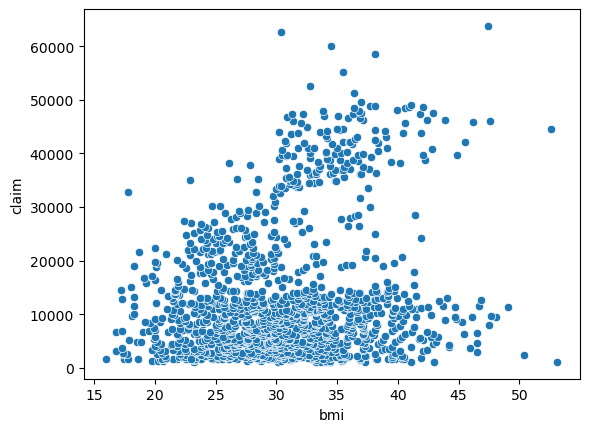

In [84]:
sns.scatterplot(x='bmi', y='claim', data=df)

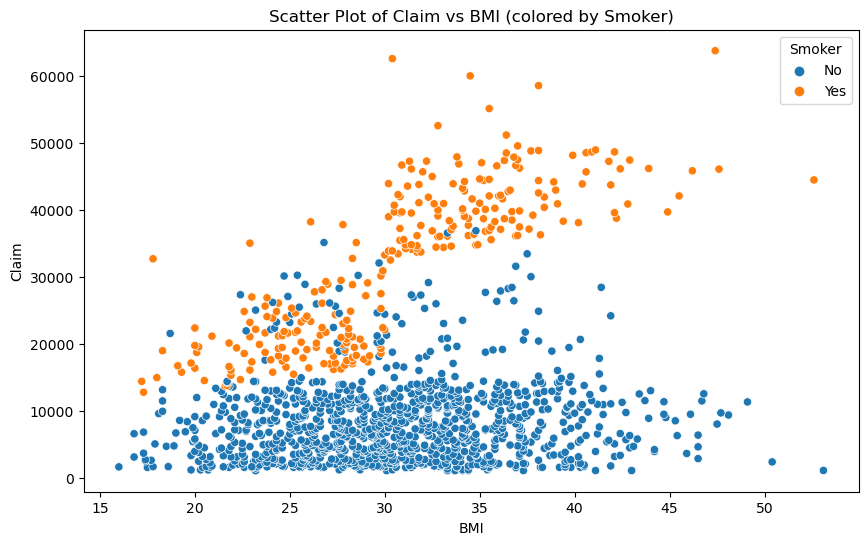

In [85]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', hue='smoker', data=df)
plt.title('Scatter Plot of Claim vs BMI (colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.legend(title='Smoker')
plt.show()

In [86]:
# Step 5: Observations from data visualization
# - There are ID columns which need to be removed
# - There are missing values that require rows to be dropped
# - Outliers require rows to be trimmed
# - Age seems to have a normal distribution with most values clustered around the mean.
# - Region is categorical with four distinct values, and the proportions are relatively balanced.
# - BMI shows some outliers towards the higher end of the distribution.
# - Claim amount is positively correlated with age but seems to have a wider spread for smokers.

# Data Preprocessing

In [87]:
# Step 1: Remove ID columns - index and PatientID
df = df.drop(columns=['index', 'PatientID'])

In [88]:
df.shape

(1340, 9)

In [89]:
# Step 2: Remove rows with missing values
df = df.dropna()

In [90]:
df.shape

(1332, 9)

In [91]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()

,age,bmi,bloodpressure,children,claim
0,39.0,23.2,91,0,1121.87
1,24.0,30.1,87,0,1131.51
7,19.0,41.1,100,0,1146.80
8,20.0,43.0,86,0,1149.40
9,30.0,53.1,97,0,1163.46


In [92]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [93]:
lower_bound

age                  2.0000
bmi                 13.4125
bloodpressure       66.5000
children            -3.0000
claim           -13271.5975
dtype: float64

In [94]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [95]:
df.shape

(1174, 9)

<Axes: xlabel='claim'>

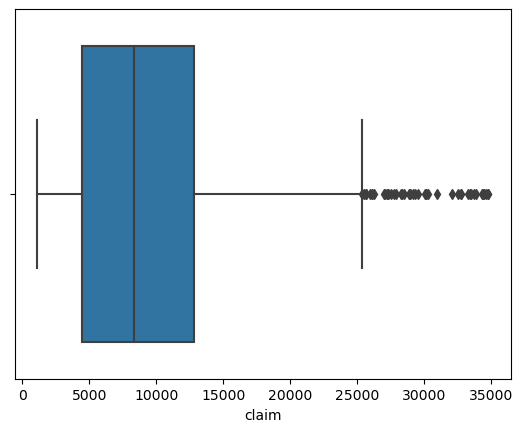

In [96]:
sns.boxplot(x=df['claim'])

In [97]:
df_num = df.select_dtypes('number')
df_num.shape

(1174, 5)

In [98]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [99]:
upper_bound

age                 74.00000
bmi                 45.95000
bloodpressure      115.00000
children             5.00000
claim            25382.18375
dtype: float64

In [100]:
upper_bound

age                 74.00000
bmi                 45.95000
bloodpressure      115.00000
children             5.00000
claim            25382.18375
dtype: float64

In [101]:
df.shape

(1174, 9)

<Axes: xlabel='claim'>

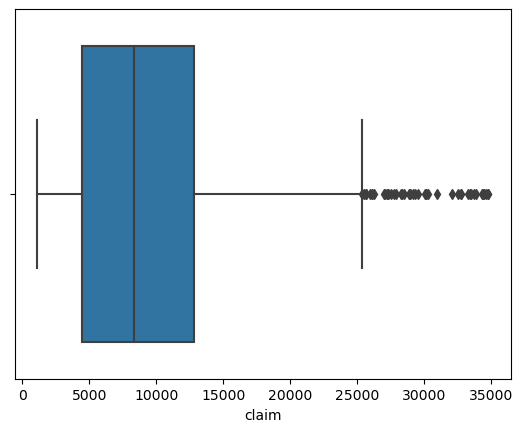

In [102]:
sns.boxplot(x=df['claim'])

In [103]:
def num_cat_identify(df):
    num_col = []
    cat_col = []
    for col in df.columns:
        if df[col].dtypes in [np.int64,np.float64,np.int32]:
            num_col.append(col)
        else:
            cat_col.append(col)
    return num_col, cat_col

In [104]:
num_col, cat_col = num_cat_identify(df)

In [105]:
for col in cat_col:
    print(df[col].value_counts())
    print('\n')

female    602
male      572
Name: gender, dtype: int64


No     612
Yes    562
Name: diabetic, dtype: int64


No     1042
Yes     132
Name: smoker, dtype: int64


southeast    380
northwest    320
southwest    278
northeast    196
Name: region, dtype: int64




In [106]:
df_ohe = pd.get_dummies(data=df,columns=cat_col,drop_first=True)

In [107]:
df_ohe

,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,1,1,0,0,1,0
1,24.0,30.1,87,0,1131.51,1,0,0,0,1,0
7,19.0,41.1,100,0,1146.80,1,0,0,1,0,0
8,20.0,43.0,86,0,1149.40,1,0,0,1,0,0
10,36.0,19.8,88,0,1241.57,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1199,30.0,33.1,93,0,34439.86,0,1,1,0,1,0
1200,40.0,32.7,98,0,34472.84,1,0,1,0,0,1
1201,45.0,33.5,81,0,34617.84,1,0,1,0,0,0
1203,26.0,34.8,94,0,34779.62,1,1,1,0,0,1


In [108]:
df_ohe.reset_index(drop=True,inplace=True)

In [109]:
df_ohe.isna().sum().sum()

0

In [110]:
std_scaler = StandardScaler()

In [111]:
y = df_ohe['claim']

In [112]:
len(y)

1174

In [113]:
df_scaled = std_scaler.fit_transform(df_ohe[num_col].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=num_col)

In [114]:
df_scaled

,age,bmi,bloodpressure,children,claim
0,0.069925,-1.151221,-0.104061,-0.899406,-1.235497
1,-1.277325,0.015045,-0.609408,-0.899406,-1.234120
2,-1.726409,1.874310,1.032969,-0.899406,-1.231936
3,-1.636592,2.195455,-0.735744,-0.899406,-1.231564
4,-0.199525,-1.725903,-0.483071,-0.899406,-1.218395
...,...,...,...,...,...
1169,-0.738425,0.522117,0.148612,-0.899406,3.524866
1170,0.159742,0.454508,0.780296,-0.899406,3.529578
1171,0.608826,0.589727,-1.367428,-0.899406,3.550295
1172,-1.097692,0.809458,0.274949,-0.899406,3.573410


In [121]:
df_ohe

,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,1,1,0,0,1,0
1,1,0,0,0,1,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,1,1,0,1,0,0
...,...,...,...,...,...,...
1169,0,1,1,0,1,0
1170,1,0,1,0,0,1
1171,1,0,1,0,0,0
1172,1,1,1,0,0,1


In [122]:
df_cleaned = pd.concat([df_scaled,df_ohe],axis=1)

In [123]:
df_cleaned.drop(columns=['claim'],inplace=True)

In [124]:
df_cleaned

,age,bmi,bloodpressure,children,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,0.069925,-1.151221,-0.104061,-0.899406,1,1,0,0,1,0
1,-1.277325,0.015045,-0.609408,-0.899406,1,0,0,0,1,0
2,-1.726409,1.874310,1.032969,-0.899406,1,0,0,1,0,0
3,-1.636592,2.195455,-0.735744,-0.899406,1,0,0,1,0,0
4,-0.199525,-1.725903,-0.483071,-0.899406,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1169,-0.738425,0.522117,0.148612,-0.899406,0,1,1,0,1,0
1170,0.159742,0.454508,0.780296,-0.899406,1,0,1,0,0,1
1171,0.608826,0.589727,-1.367428,-0.899406,1,0,1,0,0,0
1172,-1.097692,0.809458,0.274949,-0.899406,1,1,1,0,0,1


In [125]:
X = df_cleaned.values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)

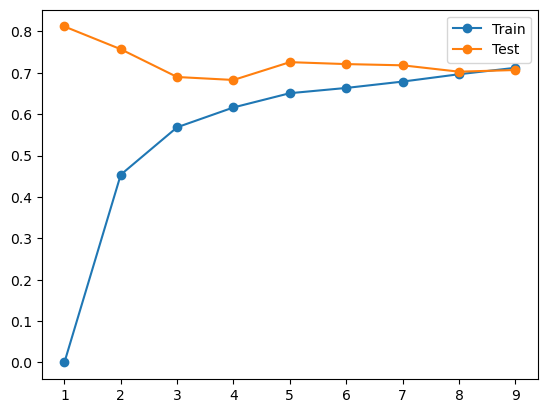

In [126]:
kvalues = np.arange(1,10)
train_error = []
test_error = []

for i in kvalues:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_error.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_error.append(mean_absolute_percentage_error(y_test,y_test_pred))

plt.plot(kvalues, train_error,label = 'Train',marker='o')
plt.plot(kvalues, test_error, label = 'Test', marker='o')
plt.legend()
plt.show()

## K fold CV

In [127]:
def kFoldCV_user_defined(X):
    X = np.arange(len(X))
    var1 = int(np.ceil(len(X)/split))
    var2 = int(np.floor(len(X)/split))
    rem = len(X)%split
    count = 0
    train_ind = []
    test_ind = []
    for j in range(rem):
        temp = X[count*var1:var1*(count+1)]
        temp_diff = list(set(X).symmetric_difference(set(temp)))
        test_ind.append(list(temp))
        train_ind.append(temp_diff)
        count+=1
    if var1 != var2:
        count = test_ind[-1][-1] +1
    else:
        count = 0
    for k in range(split-rem):
        temp = X[count+var2*k:count+var2*(k+1)]
        temp_diff = list(set(X).symmetric_difference(set(temp)))
        test_ind.append(list(temp))
        train_ind.append(temp_diff)
    # for i in range(split):
    #     print(f'TRAIN: {train_ind[i]}  TEST: {test_ind[i]}')
    return train_ind, test_ind

1056 118


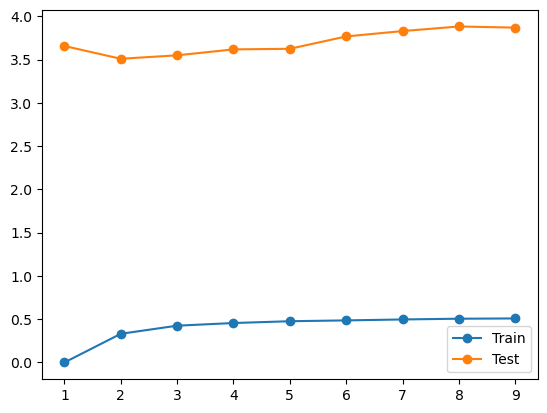

1056 118


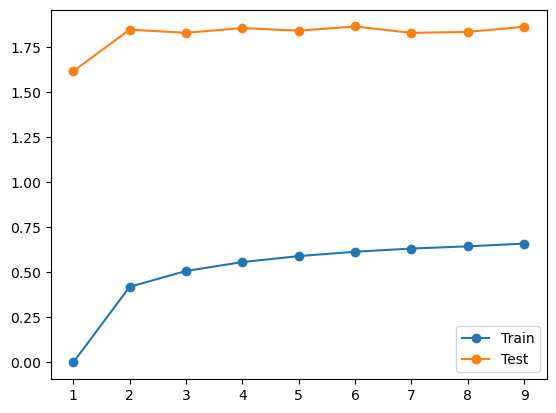

1056 118


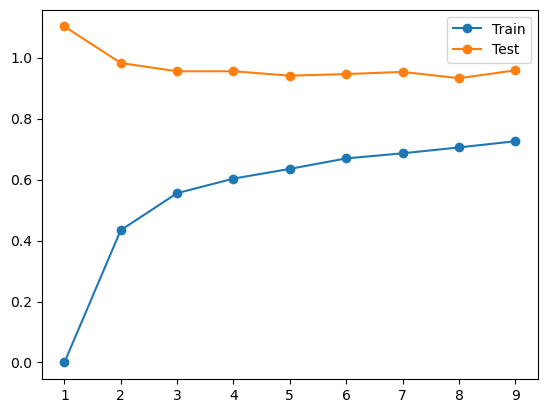

1056 118


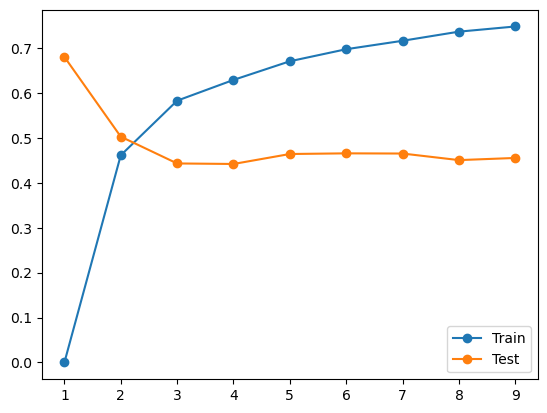

1057 117


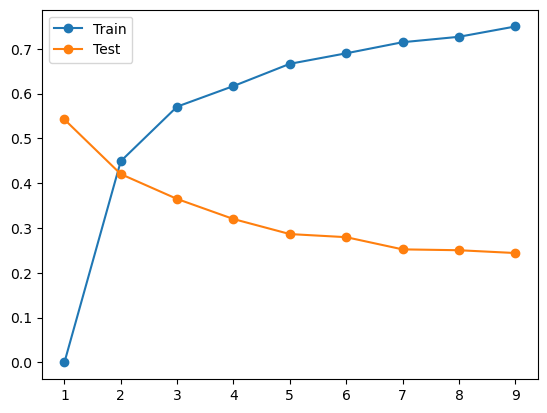

1057 117


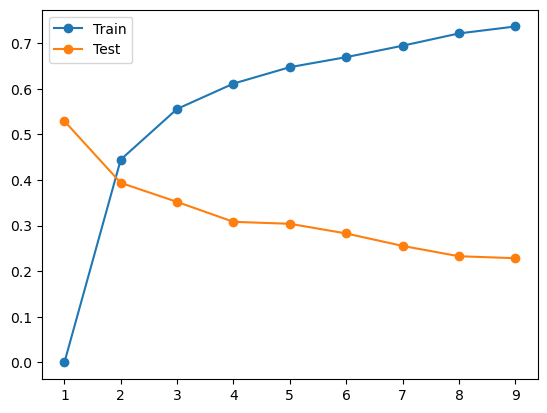

1057 117


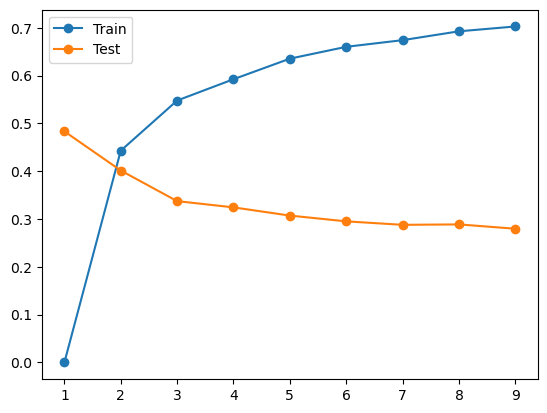

1057 117


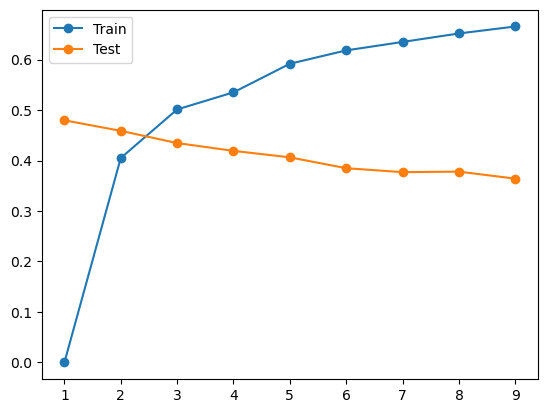

1057 117


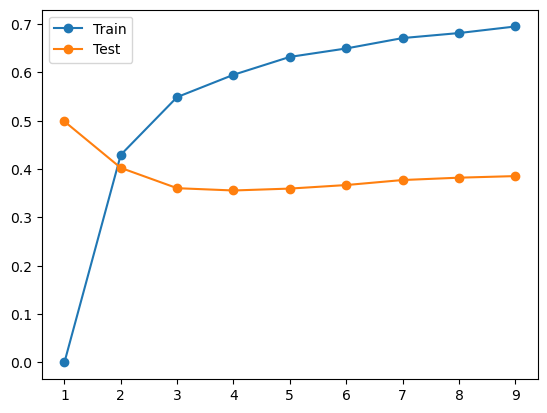

1057 117


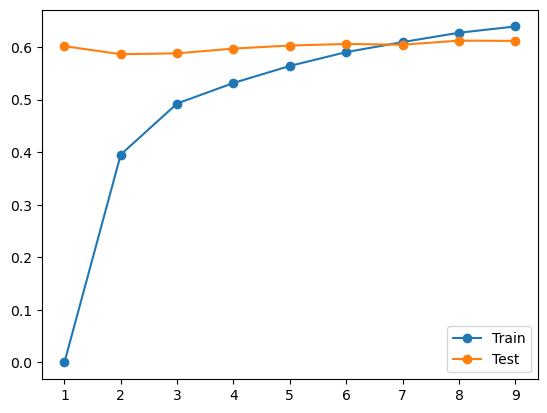

In [128]:
split = 10
train_ind, test_ind = kFoldCV_user_defined(X)
kvalues = np.arange(1,10)
for i in range(len(train_ind)):
    # print("TRAIN:", train_index[i], "TEST:", test_index[i])
    X_train, X_test = X[train_ind[i]], X[test_ind[i]]
    y_train, y_test = y[train_ind[i]], y[test_ind[i]]
    train_error = []
    test_error = []
    print(len(X_train),len(X_test))
    for i in kvalues:
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train,y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_error.append(mean_absolute_percentage_error(y_train,y_train_pred))
        test_error.append(mean_absolute_percentage_error(y_test,y_test_pred))
    
    plt.plot(kvalues, train_error,label = 'Train',marker='o')
    plt.plot(kvalues, test_error, label = 'Test', marker='o')
    plt.legend()
    plt.show()